<a href="https://colab.research.google.com/github/zarakkhan36/AI/blob/main/WaterJugPuzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Production Systems in AI**

* A  **production system** is a type of computational model used primarily for automated reasoning, problem solving, and expert systems.

* It's based on a set of rules (productions) and a control system that applies these rules to reach conclusions or make decisions.

* **Start State**:
This is the initial configuration or condition of the system (stored in the working memory or knowledge base).

* **Goal State**:
This is the desired end condition or solution that the system tries to reach by applying rules.

* **Rule Application**:
Rules are applied iteratively to transform the state.

* **Goal Test**:
After each rule application, the system checks if the goal state has been reached.

* **Termination**:
The system stops either when The goal state is achieved, or no applicable rules remain.



## **The Farmer-Chicken-Fox Puzzle**

A farmer is at the left bank of a river, having bought a chicken, fox, and a bag of corn. The farmer would like to get to his house on the other side of the river using a small boat. For some reason he can take at most one item at a time. If the chicken is left alone with the corn, it will eat the corn. If the fox is left alone with the chicken, it will eat the chicken. How does the farmer get across the river without losing any item?


# **Start State**
  
* [**Left**: Farmer, Fox, Chicken, Corn,   **right**: Farmer, Fox, Chicken, Corn]
* [1,1,1,1,    0,0,0,0]




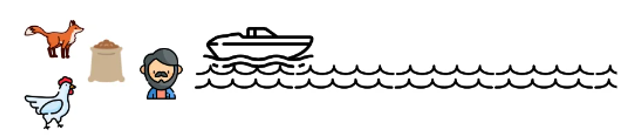

## **Goal State**

* [**Left**: Farmer, Fox, Chicken, Corn,   **right**: Farmer, Fox, Chicken, Corn]
* [0,0,0,0, 1,1,1,1]

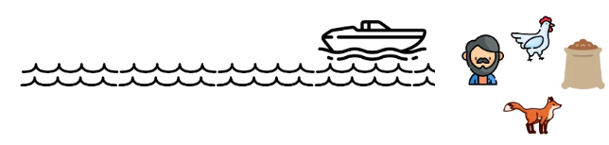

## **The Solution**
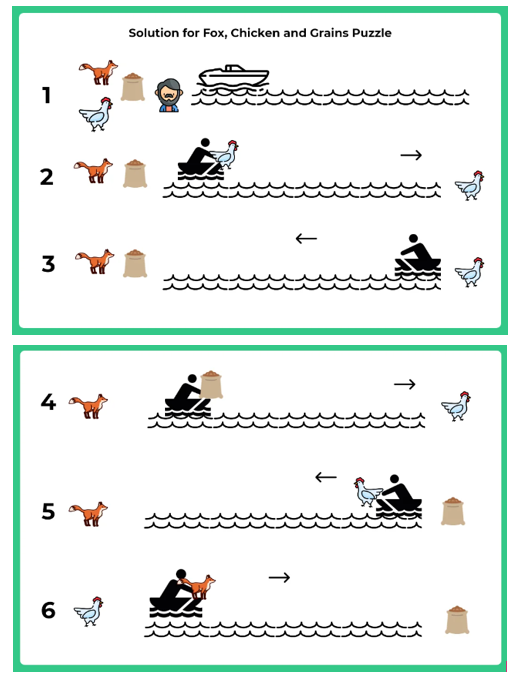

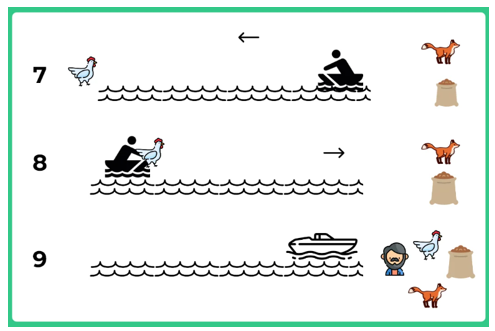


In [1]:


# Zarak Khan
# CSC 362 AI
# 9/9/25
# WaterJugPuzzle
# HW1 - Purpose: Implement water jug puzzle, provide sequence of
# rule applications that reaches goal: 4L in 5L jug



class WaterJugPuzzle():

  # set max capacities of the large and small jugs
  CAP_LARGE = 5
  CAP_SMALL = 3

# initialize default values of both jugs (empty)
  def __init__(self, large=0, small=0):
      self.large = int(large)
      self.small = int(small)

# save current state
  def save_state(self):
      self._saved_large = self.large
      self._saved_small = self.small

# restore to previously saved state if invalid move is made
  def undo_state(self):
      self.large = self._saved_large
      self.small = self._saved_small

# check if both jugs have valid amounts (not negative or above capacity)
  def state_ok(self):
      if not (0 <= self.large <= self.CAP_LARGE):
          return False
      if not (0 <= self.small <= self.CAP_SMALL):
          return False
      return True

# check if the goal is reached: exactly 4L in large jug
  def the_goal(self):
      return self.large == 4

# if state is invalid, use undo_state() to go back to previous state
# ensures no illegal moves are made
  ####################################################################
  # Rule 1: Fill the large jug completely
  ####################################################################
  def R1_fill_large(self):
      self.save_state()
      self.large = self.CAP_LARGE
      if not self.state_ok():
          self.undo_state()

  ####################################################################
  # Rule 2: Fill the small jug fully
  ####################################################################
  def R2_fill_small(self):
      self.save_state()
      self.small = self.CAP_SMALL
      if not self.state_ok():
          self.undo_state()

  ########################################################################
  # Rule 3: Empty the large jug fully
  ########################################################################
  def R3_empty_large(self):
      self.save_state()
      self.large = 0
      if not self.state_ok():
          self.undo_state()

  ####################################################################
  # Rule 4: Empty the small jug fully
  ####################################################################
  def R4_empty_small(self):
      self.save_state()
      self.small = 0
      if not self.state_ok():
          self.undo_state()

  ########################################################################
  # Rule 5: Pour water from large jug into small jug until small jug is full
  # or large jug is empty
  ########################################################################
  def R5_pour_large_to_small(self):
      self.save_state()
      space_in_small = self.CAP_SMALL - self.small
      amount_to_transfer = min(self.large, space_in_small)
      self.large -= amount_to_transfer
      self.small += amount_to_transfer
      if not self.state_ok():
          self.undo_state()

  ########################################################################
  # Rule 6: Pour from small jug into large jug until large jug is full
  # or small jug is empty
  ########################################################################
  def R6_pour_small_to_large(self):
      self.save_state()
      space_in_large = self.CAP_LARGE - self.large
      amount_to_transfer = min(self.small, space_in_large)
      self.small -= amount_to_transfer
      self.large += amount_to_transfer
      if not self.state_ok():
          self.undo_state()

  ########################################################################
  # Display current state of both jugs
  ########################################################################
  def print_state(self):
      print("Large (5L): " + str(self.large) + "L, Small (3L): " + str(self.small) + "L")



In [2]:
#@title Forming the Solution

wjp = WaterJugPuzzle()

# print the initial state
wjp.print_state()


print("-----------------------")
# apply a rule and print the resulting state
wjp.print_state()

print("-----------------------")
wjp.R1_fill_large()          # fill the 5L jug
wjp.print_state()

print("-----------------------")
wjp.R5_pour_large_to_small() # pour from 5L into 3L jug
wjp.print_state()

print("-----------------------")
wjp.R4_empty_small()         # empty 3L jug
wjp.print_state()


print("-----------------------")
wjp.R5_pour_large_to_small() # pour remaining 2L into 3L jug
wjp.print_state()

print("-----------------------")
wjp.R1_fill_large()          # fill 5L jug again
wjp.print_state()

print("-----------------------")
wjp.R5_pour_large_to_small() # pour from 5L until 3L is full

# check if goal is reached and display message
if wjp.the_goal():
    print("Goal reached: 4L are in the 5L jug!")




Large (5L): 0L, Small (3L): 0L
-----------------------
Large (5L): 0L, Small (3L): 0L
-----------------------
Large (5L): 5L, Small (3L): 0L
-----------------------
Large (5L): 2L, Small (3L): 3L
-----------------------
Large (5L): 2L, Small (3L): 0L
-----------------------
Large (5L): 0L, Small (3L): 2L
-----------------------
Large (5L): 5L, Small (3L): 2L
-----------------------
Goal reached: 4L are in the 5L jug!
